# Experiência 3 Fluidos e Viscosidade

## 1. Objetivo

Determinar a viscosidade do fluido

## 2. Informações Teóricas

Viscosidade é uma grandeza física que nos fornece a medida da resistência de um fluido à tensões de cisalhamento. A viscosidade de um gás aumenta com a temperatura, enquanto que a de um líquido diminui. Para pressões moderadas, a viscosidade independe da pressão, mas para pressões muito altas a viscosidade dos gases e da maioria dos líquidos não tem lei bem definida de variação.
	Quando um corpo sólido se move em um fluido, a camada de fluido adjacente ao sólido adere à superfície do mesmo dando origem a uma força resistiva ao seu movimento. No caso de uma esfera de raio   movendo-se com velocidade   constante num meio infinito de viscosidade  , essa força de atrito é dada por, 



$$
\begin{equation}
\overrightarrow{F}= - 6 \pi \eta r \overrightarrow{v}
\label{eq:atrito1} \tag{1}
\end{equation}
$$

onde o sinal negativo indica que a direção da força é oposta à da velocidade. No S.I., a unidade da viscosidade é $N\cdot s \cdot m^{-2}$   . Todavia, no sistema Gaussiano utilizamos o poise $(1P = 1g \cdot cm^{-1} \cdot s^{-1})$ .


A expressão acima é válida para um regime de escolamento laminar, e é conhecida como Lei de Stokes. Se o meio não é infinito, a fórmula acima deve ser corrigida para se levar em conta as dimensões do recipiente. No caso do movimento de uma esfera de raio   se movendo no eixo de um tubo cilíndrico de raio $R$, a força de atrito pode ser escrita como:

$$
\begin{align}
F_a = (1+C)F_{a \infty}
\label{eq:atrito2} \tag{2}
\end{align}
$$

onde $C = (9r/4r)^2 + (9r/4r)$ é conhecido como lei de Landerburg.

## 3. Queda de Esferas em Meio Viscoso

Quando um corpo se move através de um fluido sob a ação de uma força $\overrightarrow{F}$ , a força resultante sobre é dada por:

$$
\begin{align}
\overrightarrow{F} + \overrightarrow{F_a} + \overrightarrow{F_P}+\overrightarrow{F_E}
\end{align}
$$

onde $\overrightarrow{F_a}$ é a força de atrito devido ao fluido, $\overrightarrow{F_P}$ é a força gravitacional e $\overrightarrow{F_E}$ é a força do empuxo.

Da Eq. (1) vemos que a força de atrito é proporcional à velocidade da corpo. Para uma esfera abandonada a partir do repouso, a medida em que sua velocidade aumenta devido a ação da força peso, aumenta também a força de atrito sobre a mesma, até que esta última contrabalance idealmente às forças peso e de empuxo, anulando portanto a aceleração do corpo. O corpo então prossegue o movimento com velocide constante, que denominamos por velocidade limite $v_{limite}$ .

Supondo que o corpo seja uma esfera de raio $ r$  e densidade de massa $ \rho_esf $ , a equação acima resulta na seguinte expressão,

$$
6 \pi \eta r v_{corr} - \frac{3}{4} \pi r^3 (\rho_{est} - \rho)g = 0
$$

onde $\rho$ a densidade de massa do fluido $e^{v_{corr}} = (1+C)v_{limite}$. Logo, ao se estabelecer o equilíbrio, a viscosidade do fluído pode ser calculada por:

$$
\eta = \frac{2}{9} \left( \frac{\rho_{esf}-\rho}{v_{corr}} \right)gr^2
$$

## 4. Código Para o Experimento

In [1]:
import numpy as np
from vpython import *
import matplotlib.pyplot as plt
import random

<IPython.core.display.Javascript object>

In [2]:
cena = canvas(
                title=' Fluidos: Viscosidade ', # Criar o palco onde ocorrerá o movimento
                width=800, height=400,
                userzoom = True,                         # O usuário não pode aproximar ou afastar a câmera
                userspin = False,                         # O usuário pode girar a câmera.
                ambient  = color.gray(.3),               # Cor da iluminação dos objetos
                  center = vector(0,30,0),              # Posição central do código
              background = vec(.6,.9,.6)                   # Cor do background
         )   

<IPython.core.display.Javascript object>

In [3]:
### Forças envolvidas:

In [4]:
def peso():
    return m*g

def empuxo():
    return - vol*dens*g

def atrito():
    F = -6* np.pi * visc * xfera.radius * mag(xfera.vel)
    C = ((9*xfera.radius)/(4*tubo.radius))**2 + ((9*xfera.radius)/(4*tubo.radius))
    return (1 + C) * F

In [5]:
tubo = cylinder(pos=vector(0,60,0), 
                axis=vector(0,-60,0), 
                radius=10,
                opacity=.3,
                color = color.blue)

xfera =  sphere(pos=tubo.pos, 
                radius=.9,
                vel=vec(0,0,0),
                color = color.black)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
### Grandezas 

In [7]:
m=10
g=10
t=0
dt=.01
vol = 4/3*np.pi*xfera.radius**3
axisp = vec(0,-1,0)
dens = random.uniform(.4, .8, )
visc = random.uniform(.2, .5, )

In [8]:
### Palco para o Movimento.

In [9]:
posicao=[]
tempo=[]

while (xfera.pos.y > 0 ):
    
    rate(1000)
    acc = (peso()+empuxo()+atrito())/m
    
    xfera.vel = xfera.vel + acc*dt*axisp
    xfera.pos = xfera.pos + xfera.vel*dt + acc/2*axisp*dt**2
    t=t+dt

    
    
    if  xfera.pos.y > 0:
       posicao.append(round(xfera.pos.y,2))
       tempo.append(round(t,3))

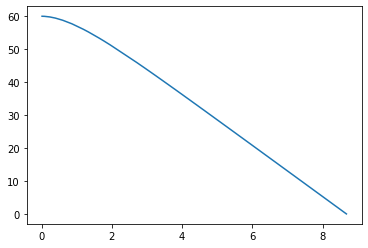

In [10]:
plt.plot(tempo,posicao)

## 5. Procedimento Experimental

Com os valores de obtidos das esferas metálicas em um líquido viscoso, contido em um tubo vertical. Note que a velocidade de queda das esferas se torna constante somente após elas percorrerem uma certa distância dentro do fluido. Sendo assim, não faça suas medidas a partir da superfície do mesmo.
Meça, com as respectivas incertezas: 
•	A temperatura do líquido no início e no final das medidas; 
•	A massa específica ( ) do líquido com densímetro; 
•	A massa média das esferas; 
•	O diâmetro do tubo;
•	A distância a ser percorrida pelas esferas em queda;
•	O diâmetro de cada esfera metálica;
•	O tempo de queda de cada esfera no meio.


## 6. Análise dos dados 

A.	Porque é necessário medir a temperatura ambiente no início e no final das suas medidas de viscosidade? 
B.	Calcular o valor médio e respectiva incerteza para o tempo de queda e distância.
C.	Calcular a velocidade limite ( ) e a respectiva incerteza.
D.	Calcular a velocidade corrigida ( ) e sua incerteza.
E.	Calcular a densidade das esferas e sua incerteza.
F.	Calcular a viscosidade do fluido e sua incerteza.
